# WeRateDogs Data wrangling project 

# 1- Gather data

In [182]:
import pandas as pd
import numpy as np 
from numpy import nan
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
# read the given file 
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [184]:
# Use requests library to programmatically download the tsv file
image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
image_predictions
#  http status code 200 shows the request has succeeded 

<Response [200]>

In [185]:
# read image_predictions file into a data frame
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(image_predictions.content)
    image_predictions = pd.read_csv('image_predictions.tsv', sep ='\t')

In [439]:
# use tweepy to query Twitter's API 

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# set Twitter's rate limit
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)



In [ ]:
# write the querying JSON data into tweet_json.txt
with open('tweet_json.txt','a',encoding = 'utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
            json.dump(tweet._json, f)
            f.write('\n')
        except: 
            print('error')

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


In [186]:

# Create a empty list for insert each tweet info into it
tweets = []

tweet_json = open('tweet-json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close()



In [187]:
print(tweets[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [188]:
#merge retweet_count,favorite_count, and 'id' in table by creating an empty dataframe  

tweet_data = pd.DataFrame()  

tweet_data['id'] = list(map(lambda tweet: tweet['id'], tweets))

tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

In [189]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# 2- Assessing data

#### I will assess the data that was gathered,in visually and programmatically for quality and tidiness issues.

## Assessing twitter_archive file 

In [190]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [191]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality issues:


<li>-There are missing data in (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)</li>
<li>-There are missing data in in_reply_to_status_id, in_reply_to_user_id.</li>
<li>-There are missing data in expanded_urls .</li>
<li>-timestamp stored as an object , should be a date as shown in the table </li>
<li>-source stored as object and shown in the table as link .</li>

Tidiness issue:
<li>-The dog stage doggo,floofer,pupper and puppo shoud be in one column </li>

In [192]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### the max rating is 10 and the table shows 1776, which describe that it's a common in we rate dogs count, the rating denominator got minimum zero should be detected if its a wrong entry data 

In [193]:
# check missing values 
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### There are  2175 missing data in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp ,59 missing expanded_urls and 2278 missing in_reply_to_status_id,in_reply_to_user_id

In [194]:
# rating_denominator is 10 and other numbers are errors,should be deleted in the cleaning part
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### There are 2333 out of  2356 rating denominator as 10 

In [195]:
#rating_numerator from 10 or less ,and other numbers could be errors
twitter_archive.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [198]:
#check for duplicate 
twitter_archive.duplicated().sum()

0

### There is no duplicate.

## Assessing  image_predictions file 

In [199]:
 image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [200]:
 image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues:


<li>-Non descriptive column names </li>


Tidiness issue:
<li>-</li>

In [201]:
 image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [202]:
# check missing values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [203]:
#check for duplicate there is nothing
image_predictions.duplicated().sum()

0

In [204]:
#count p1 (the prediction for the image in the tweet ) 
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

# Assessing tweet_data file

In [205]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [206]:
tweet_data.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [207]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### There is 2354 tweet data and all data type are fine ,seems there are no duplicate data .

In [208]:
#check for duplicate data
tweet_data.duplicated().sum()

0

In [209]:
tweet_data.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

### Assessment report

*Tidiness Issues for the following files :


<li>1-Combine each dog stage column into a single column named "dog_stage".</li>

  <li>2-Drop unnecessary columns.</li>
  
<li> 3- Merge tweet_data table into the twitter_archive table.</li>

---------------------------------------------------------------------

*Quality issues for the following files :

 
<b>twitter_archive file:</b>

<li>1-In the column “rating_numirator” there are extreme values greater than 10 ,will not affect the analysis. </li>
<li>2-In the column "rating denominator" there are some value less than 10, I think its incorrect data and should be checked</li>
<li>3-There are missing values in (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) also not needed in this analysis because the key point is original tweets not retweets .</li>
<li>4-There are  are missing values in_reply_to_status_id, in_reply_to_user_id also not needed in this analysis because the key point is original tweets not retweets.  </li>
<li>5-There are missing data in expanded_urls .</li>
<li>6-There are text in the'source' should be removed .</li>
<li>7-The timestamp stored as object which should be date</li>
 
<b>image_predictions file:</b>
<li>1-Change the names of columns p1, p2 and p3 to reasonable names.</li>
<li>2-Capitalize the first letter of the first prediction for consistency.</li>
<li>3-There are some strange values in the p1 columns should be deleted .</li>


 
<b>tweet_data file:</b>
<li> 1-rename the column 'id' to 'tweet_id'</li>



    
    




# 3-Data Cleaning


In [332]:
#first copy the files 
twitterarchive_clean = twitter_archive.copy()
imageprediction_clean = image_predictions.copy()
tweetdata_clean = tweet_data.copy()

## Cleaning quality issues

### image_predictions file

#### Define : 1-Change the names of columns p1, p2 and p3 to reasonable names.

Code

In [333]:
imageprediction_clean.rename(index=str, columns={"p1" :"prediction1", "p1_conf":"prediction_confidence1","p1_dog" : "dogbreed_indicator1",
                                                "p2" :"prediction2", "p2_conf":"prediction_confidence2","p2_dog" : "dogbreed_indicator2",
                                                 "p3" :"prediction3", "p3_conf":"prediction_confidence3","p3_dog" : "dogbreed_indicator3",
                                                 "img_num" : "confident_img_num"}, inplace =True)



Test

In [334]:
imageprediction_clean.head(1)

,tweet_id,jpg_url,confident_img_num,prediction1,prediction_confidence1,dogbreed_indicator1,prediction2,prediction_confidence2,dogbreed_indicator2,prediction3,prediction_confidence3,dogbreed_indicator3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Define2-Capitalize the first letter of the first prediction for consistency

Code:

In [335]:
imageprediction_clean['prediction1'] = imageprediction_clean.prediction1.str.capitalize()

Test:

In [336]:
imageprediction_clean.prediction1

0            Welsh_springer_spaniel
1                           Redbone
2                   German_shepherd
3               Rhodesian_ridgeback
4                Miniature_pinscher
5              Bernese_mountain_dog
6                        Box_turtle
7                              Chow
8                     Shopping_cart
9                  Miniature_poodle
10                 Golden_retriever
11                    Gordon_setter
12                     Walker_hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English_setter
17                              Hen
18                 Desktop_computer
19                Italian_greyhound
20                      Maltese_dog
21                 Three-toed_sloth
22                               Ox
23                 Golden_retriever
24                         Malamute
25                       Guinea_pig
26      Soft-coated_wheaten_terrier
27                        Ch

## twitter_archive file:

### Define:3-checke data less than 10 in "rating denominator"  , if it is incorrect data should be replaced 

Code: 

In [337]:
twitterarchive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [338]:
#Check for rating denominator values not equal to 10 by mistake
data= twitterarchive_clean[twitterarchive_clean['rating_denominator'] < 10]
data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [339]:
#checking the text it seems reply in conversation not a rating , its incorrect
twitterarchive_clean.loc[twitterarchive_clean.tweet_id == 835246439529840640].text

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

#### this tweet was a reply to correct someone rate hai meanes 13/10

In [340]:
twitterarchive_clean.loc[twitterarchive_clean.tweet_id == 666287406224695296].text 

2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object

#### this is real rating , i google it and found that he rated the Albanian 9 out of 10

In [341]:
twitterarchive_clean.loc[twitterarchive_clean.tweet_id == 810984652412424192].text 

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object

#### I was interested to check this tweet , and it was the cutest also there is a mistake in writing the rating 


In [342]:
#coreect the rating above using tweet_id to 10
twitterarchive_clean.loc[twitterarchive_clean.tweet_id == 835246439529840640, ['rating_denominator']] = 10
twitterarchive_clean.loc[twitterarchive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10
twitterarchive_clean.loc[twitterarchive_clean.tweet_id == 810984652412424192, ['rating_denominator']] = 10


Test:

In [343]:
twitterarchive_clean.rating_denominator.value_counts()

10     2336
11        3
50        3
80        2
20        2
15        1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
16        1
Name: rating_denominator, dtype: int64

### Define:4-remove missing data in expanded_urls .

Code:

In [344]:
#Drop data with nan value in expanded_urls
twitterarchive_clean = twitterarchive_clean.dropna(subset = ['expanded_urls'])


Test:

In [345]:
twitterarchive_clean[twitterarchive_clean['expanded_urls'].isnull()][['tweet_id', 'expanded_urls']]


,tweet_id,expanded_urls


### Define:5-remove text from source 

In [346]:
twitterarchive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2163
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       32
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [347]:
#remove text in source
twitterarchive_clean.source = twitterarchive_clean.source.apply(lambda st: st[st.find('">')+2:st.find("</")])

Test:

In [348]:
twitterarchive_clean.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

### Define:6-chang timestamp to date 

code:

In [349]:
#chang timestamp datatype to datetime
twitterarchive_clean['timestamp'] = pd.to_datetime(twitterarchive_clean['timestamp'])

Test:

In [350]:
twitterarchive_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Define: 7- Remove retweet,reply keep only original tweet

Code:

In [351]:
#Drop recordes that are retweets 
twitterarchive_clean.drop(twitterarchive_clean[twitterarchive_clean.retweeted_status_id.notnull()].index,inplace = True)


In [352]:
twitterarchive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)


Test:

In [353]:
twitterarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 215.0+ KB


## tweet_data file :

#### Define:8-rename the id to tweet_id

Code:

In [354]:
#rename the id to tweet_id
tweetdata_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

Test:

In [355]:
tweetdata_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Cleaning Tidiness Issues

#### Define :1-Combine each dog stage column into a single column named "dog_stage"

Code:

In [356]:
twitterarchive_clean.replace('None', np.nan, inplace=True)
twitterarchive_clean['dog_stage'] = twitterarchive_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').sum(axis=1).astype(str)
#Drop duplicated columns
twitterarchive_clean = twitterarchive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [357]:
# fill empty cell using np.nan  
twitterarchive_clean['dog_stage'] = twitterarchive_clean['dog_stage'].replace('', np.nan)

Test:

In [358]:
twitterarchive_clean['dog_stage'].value_counts()

pupper          222
doggo            72
puppo            23
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

#### Define : 3- Merge twitterarchive_clean and tweetdata_clean using inner join.

Code:

In [359]:
# using tweet_id i will join the tables using inner join 
twitterarchive_clean = pd.merge(twitterarchive_clean,tweetdata_clean, on ='tweet_id', how = 'inner')

In [360]:
 twitterarchive_clean.duplicated().sum()

0

Test:

In [361]:
twitterarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 11 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1495 non-null object
dog_stage             338 non-null object
retweet_count         2117 non-null int64
favorite_count        2117 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 198.5+ KB


## Store combined and cleaned data in twitter_archive_master.csv

In [362]:
twitterarchive_clean.to_csv('twitter_archive_master.csv')

# Analysis and visualises into final data

In [363]:
twitterarchive_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,3261,20562
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,2158,12041
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,16716,56848
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,4429,28226
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467


### -What is the most rating dog stage ?

In [364]:
stag_chart=twitterarchive_clean.groupby('dog_stage').rating_numerator.max()

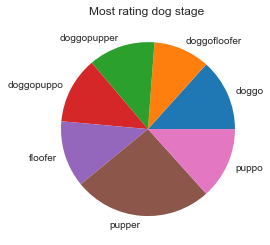

In [365]:
chart =stag_chart.plot.pie()
chart.set(title = 'Most rating dog stage ')
chart.set_ylabel('')
chart.set_xlabel('');



#### The chart above shows that people always get excited to small dogs (pupper) which reflect on their rating.

### -What is the most source people using to rate?

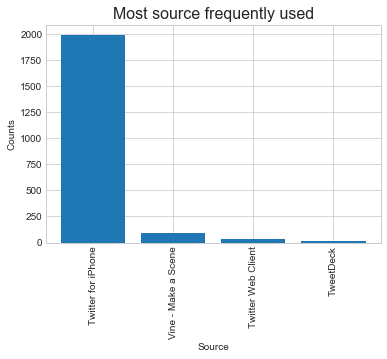

In [366]:
s_chart = twitterarchive_clean['source'].value_counts()
axis = plt.bar([1, 2, 3, 4], s_chart , align = "center")
plt.xticks([1, 2, 3, 4], s_chart.index ,rotation=90);
plt.xlabel("Source");
plt.ylabel("Counts");
plt.title("Most source frequently used" ,fontsize = 16);


### -Insight on Rating over time

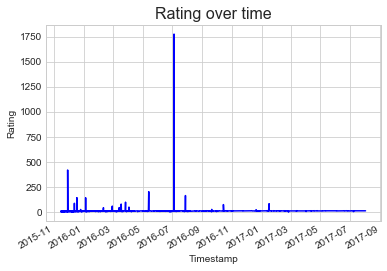

In [367]:
twitterarchive_clean.set_index('timestamp', inplace=True)
twitterarchive_clean['rating_numerator'].plot(color = 'blue', label='Retweets')
plt.style.use('seaborn-whitegrid')
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.title('Rating over time', fontsize = 16)
plt.show()



In [369]:
twitterarchive_clean[twitterarchive_clean['rating_numerator'] <= 10]['rating_numerator'].describe()

count    857.000000
mean       8.634772
std        2.012427
min        0.000000
25%        8.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: rating_numerator, dtype: float64

-75% rate more than 10 

-most rating was in 2016 


In [249]:
imageprediction_clean.head()

,tweet_id,jpg_url,confident_img_num,prediction1,prediction_confidence1,dogbreed_indicator1,prediction2,prediction_confidence2,dogbreed_indicator2,prediction3,prediction_confidence3,dogbreed_indicator3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### What are top 10 Dog Breeds predction ?

In [252]:
#count number of breeds predition
breeds= imageprediction_clean.prediction1.value_counts().head(10)
breeds

Golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
Chow                   44
Samoyed                43
Toy_poodle             39
Pomeranian             38
Cocker_spaniel         30
Name: prediction1, dtype: int64

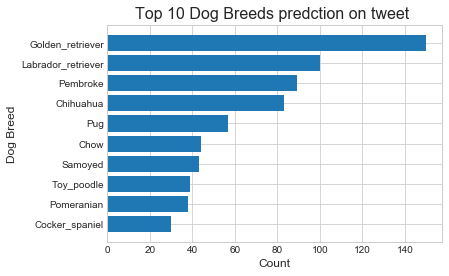

In [253]:
plt.barh(breeds.index , breeds)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds predction on tweet ',fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

### Reference


https://pythonbasics.org/read-json-file/

https://hookedondata.org/better-plotting-in-python-with-seaborn/

https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html

https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor
